딥러닝 파이토치 교과서 ch4 p.138~163

---
## 4.1 인공 신경망의 한계와 딥러닝 출현

## 4.2 딥러닝 구조
- #### 4.2.1 딥러닝 용어
- #### 4.2.2 딥러닝 학습
- #### 4.2.3 딥러닝 문제점과 해결 방안
- #### 4.2.4 딥러닝을 사용할 때 이점

## 4.3 딥러닝 알고리즘
- #### 4.3.1 심층 신경망
- #### 4.3.2 합성곱 신경망
- #### 4.3.3 순환 신경망
- #### 4.3.4 제한된 볼츠만 머신
- #### 4.3.5 심층 신뢰 신경망
---

## 4.1 인공 신경망의 한계와 딥러닝 출현

- 퍼셉트론(선형 분류기) : 다수의 신호를 입력으로 받아 하나의 신호를 출력


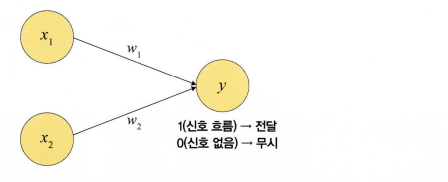

- 입력이 (x1, x2)로 두 개라고 할 때 논리 게이트별로 인식하는 방법

**AND 게이트**




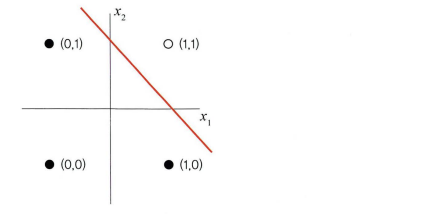

**OR 게이트**

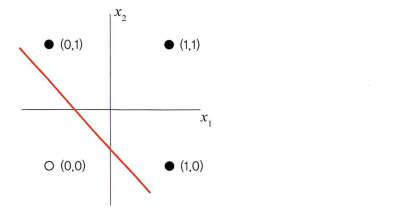

**XOR 게이트**
- 데이터가 비선형적으로 분리됨.
- 단층 퍼셉트론에선 XOR에 대한 학습이 불가능
- 극복 방안으로 입력층과 출력층 사이에 하나 이상의 은닉층을 두어 비선형적으로 분리되는 데이터에 대해서도 학습이 가능하도록 다층 퍼셉트론을 고안.
- 이 심층 신경망을 **딥러닝(DNN)**이라고 부름.

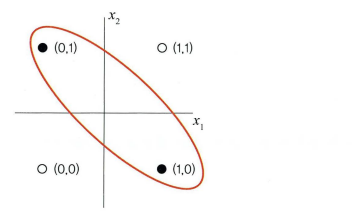

## 4.2 딥러닝 구조
#### 4.2.1 딥러닝 용어



- 딥러닝 구조

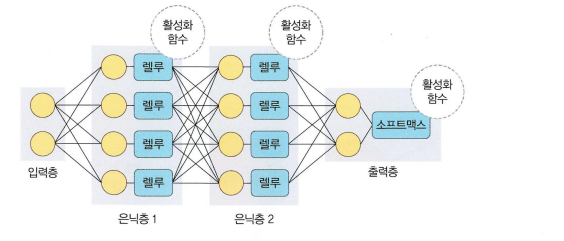

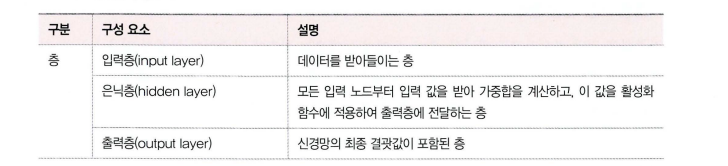

**가중치**
   - 입력값이 연산 결과에 미치는 영향력을 조절하는 요소


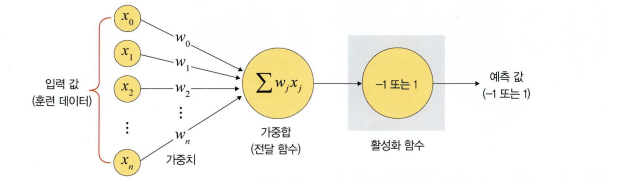

**가중합 또는 전달 함수**
   - 각 노드에서 들어오는 신호에 가중치를 곱해서 다음 노드로 전달함. 이 합계를 가중합이라고 부름.
   - 또한, 활성화 함수로 보내기 직전 단계이므로 전달 함수라고도 부름.


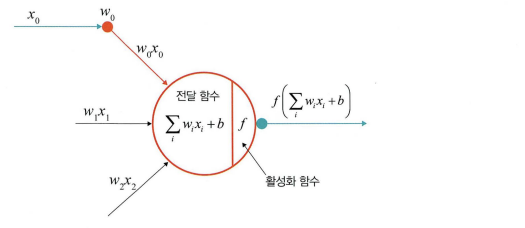

- 가중합 구하는 공식

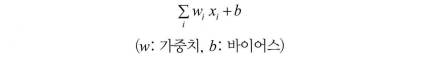

**활성화 함수**: 전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변환시키는 **비선형** 함수
   - 시그모이드 함수:
      - 선형 결과를 0~1 사이에서 비선형 형태로 변형시켜줌.
      - 주로 로지스틱 회귀와 같은 분류 문제를 확률적으로 표현하는 데에 사용됨.
      - 딥러닝 모델의 깊이가 깊어지면 기울기가 사라지는 '기울기 소멸 문제'가 발생
      - 수식과 미분결과 그래프
   


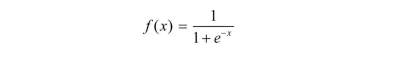

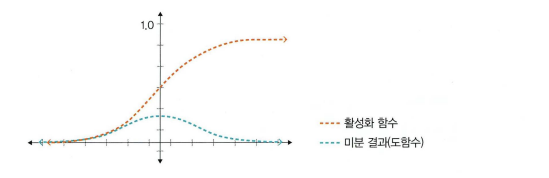

   - 하이퍼볼릭 탄젠트 함수
      - 선형 함수의 결과를 -1~1 사이에서 비선형 형태로 변형시켜줌.
      - 시그모이드에서 결괏값의 평균이 0이 아니라 양수로 편향되는 문제는 해결
      - 기울기 소멸 문제는 여전히 발생


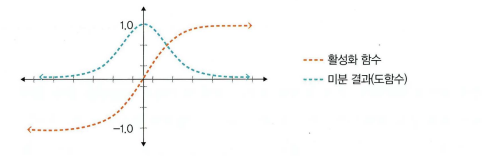

   - 렐루 함수
      - 입력값이 음수일 땐 0을, 양수일 땐 x를 출력
      - 경사 하강법에 영향을 주지 않아 학습 속도가 빠름.
      - 기울기 소멸 문제 X
      - 일반적으로 은닉층에서 사용
      - 음수값을 입력값으면 항상 0을 출력해서 학습 능력이 감소하는 문제가 있음.


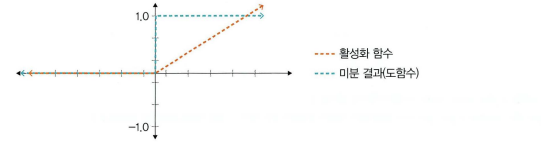

   - 리키 렐루 함수
      - 입력값이 음수면 0이 아니라 0.001과 같이 매우 작은 수를 반환
      - 입력값이 수렴하는 구간이 제거되어 렐루 함수 사용시 문제점을 해결.


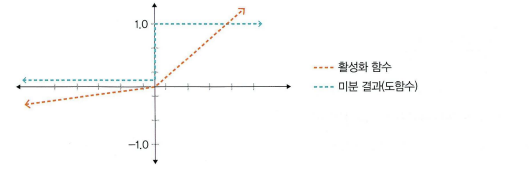

   - 소프트맥스 함수
      - 입력값을 0~1 사이에 출력되도록 정규화
      - 출력값들의 총합이 항상 1이 되도록 함.
      - 보통 출력 노드의 활성화 함수로 많이 사용됨.
      - 수식: 분자는 입력 신호의 지수 함수, 분모는 모든 입력 신호의 지수 함수 합


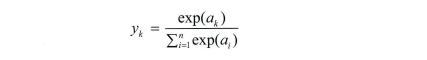



```

# 은닉층의 활성화 함수로 렐루를, 출력층의 활성화 함수로 소프트맥스를 사용한 모델을 구현한 코드

class Net(torch.nn.Module):
   def __init__(self, n_feature, n_hidden, n_output):
      self.hidden = torch.nn.Linear(n_feature, n_hidden) #...은닉층
      self.relu = torch.nn.ReLu(inplace=True)
      self.out = torch.nn.Linear(n_hidden, n_output) #...출력층
      self.softmax = torch.nn.Softmax(dim=n_output)
   def forward(self, x):
      x = self.hidden(x)
      x = self.relu(x) #...은닉층을 위한 활성화 함수
      x = self.out(x)
      x = self.softmax(x) #...출력층을 위한 소프트맥스 활성화 함수
      return x

```



**손실 함수**
- 경사 하강법
   - 학습률과 손실 함수의 순간 기울기를 이용하여 가중치를 업데이트하는 방법
   - 미분의 기울기를 이용하여 오차를 비교하고 최소화하는 방향으로 이동시키는 방법
   - 손실함수는 오차를 구하는 방법을 의미
- 평균 제곱 오차 (MSE)
   - 실제 값과 예측 값의 차이를 제곱하여 평균 낸 값
   - MSE
   - 작을수록 예측력이 좋음.
   - 주로 회귀에서 사용됨.
   - 수식


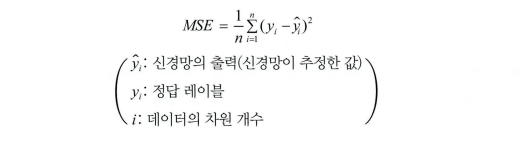



```
# 오차 함수로 평균 제곱 오차를 구현한 코드

import torch

loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)
```



- 크로스 엔트로피 오차 (CEE)
   - 분류 문제에서 원-핫 인코딩했을 때 사용할 수 있는 오차 계산법
   - MSE와 시그모이드 활성화 함수를 결합하면 시그모이드 특성 때문에 기울기가 매끄럽지 못한 상태가 되어 학습 속도가 매우 늦음.
   - CEE는 두 개의 확률 분포 차이를 이용하기 때문에 시그모이드 활성화 함수의 영향을 덜 받음.
   - 따라서 학습 속도가 빠름.
   - 수식

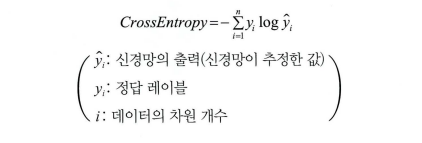



```
# 오차 함수로 크로스 엔트로피 오차를 구현한 코드

loss = nn.CrossEntropyLoss()
input = torch.randn(5, 6, requires_grad=True) #---torch.randn은 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용하여 숫자를 생성
target = torch.empty(3, dtype=torch.long).random_(5)  #---torch.empty는 dtype torch.float32의 랜덤한 값으로 채워진 텐서를 반환
output = loss(input, target)
output.backward()
```



#### 4.2.2 딥러닝 학습



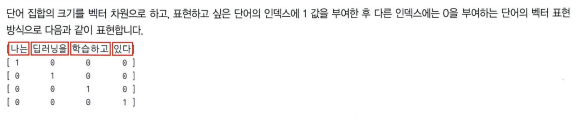

- 순전파
   - 네트워크에 훈련 데이터가 들어올 때 발생
   - 데이터를 기반으로 예측값을 계산하기 위해 전체 신경망을 교차해 지나감.
   - 모든 뉴런이 이전 층의 뉴런에서 수신한 정보에 변환을 적용하여 다음 은닉층의 뉴런으로 전송하는 방식
   - 데이터가 모든 층을 통과하고 모든 뉴런이 계산을 완료하면 그 예측값은 최종 출력층에 도달하게 됨.

- 역전파
   - 손실 오차가 계산되면 그 정보는 역으로 출력층 -> 은닉층 -> 입력층으로 전파됨. 이 순서로 모든 뉴런에 대해 진행해서 계산된 각 뉴런 결과를 또다시 순전파의 가중치 값으로 사용.
   - 은닉층의 뉴런은 각 뉴런이 원래 출력에 기여한 상대적 기여도에 따라 값이 달라짐.
   - 즉, 예측값과 실제값의 차이를 각 뉴런의 가중치로 미분한 후 기존 가중치 값에서 뺌.
   

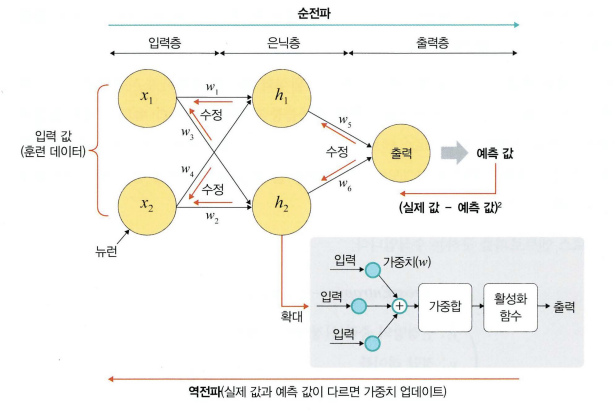

#### 4.2.3 딥러닝 문제점과 해결 방안

은닉층이 많을수록  
1. 과적합 문제 발생
   - 훈련 데이터를 과하게 학습해서 예측값과 실제값의 차이인 오차가 감소하지만, 검증 데이터에 대한 오차는 증가함.
   - 해결방안으로 **드롭 아웃**을 사용.
      - 신경망 모델이 과적합되는 것을 피하기 위해서 학습 과정 중 임의로 일부 노드들을 학습에서 제외시키는 방법


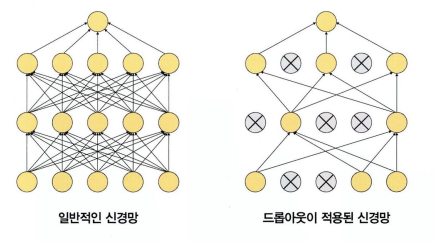



```

# 드롭아웃을 구현한 코드

class DropoutModel(torch.nn.Module):
   def __init__(self):
      super(DropoutModel, self).__init__()
      self.layer1 = torch.nn.Linear(784, 1200)
      self.dropout1 = torch.nn.Dropout(0.5) #...50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
      self.layer2 = torch.nn.Linear(1200, 1200)
      self.dropout2 = torch.nn.Dropout(0.5)
      self.layer3 = torch.nn.Linear(1200, 10)
   def forward(self, x):
      x = F.relu(self.layer1(x))
      x = self.dropout1(x)
      x = F.relu(self.layer2(x))
      x = self.dropout2(x)
      return self.layer3(x)

```



2. 기울기 소멸 문제 발생
   - 은닉층이 많은 신경망에서 주로 발생
   - 출력층에서 은닉층으로 전달되는 오차가 크게 줄어 학습이 되지 않는 현상
   - 기울기가 소멸되기 때문에 학습되는 양이 0에 가까워져서 학습이 더디게 진해되다가 오차를 더 이상 둘이지 못하고 그 상태로 수렴하는 현상
   - 시그모이드나 하이퍼볼릭 탄젠트 대신에 렐루 활성화 함수를 사용하면 해결할 수 있음.

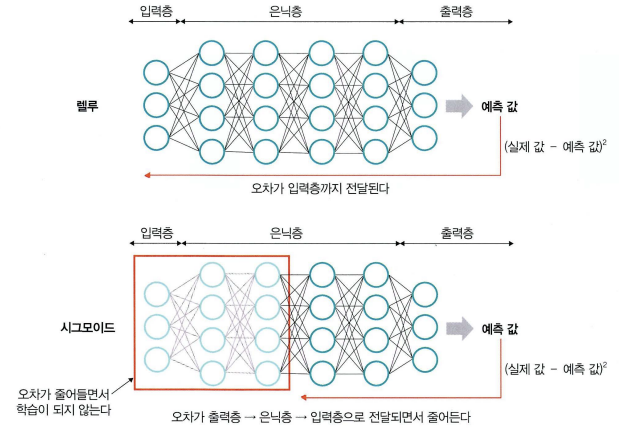

3. 성능이 나빠지는 문제 발생
   - 경사 하강법은 손실함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복.
   - 이때 성능이 나빠지는 문제가 발생.
   - 이를 개선하고자 확률적 경사 하강법, 미니 배치 경사 하강법을 사용
     - **배치 경사 하강법**
         - 전체 데이터셋에 대한 오류를 구한 후 기울기를 **한번만** 계산하여 파라미터를 업데이트
         - 전체 훈련 데이터셋에 대해 가중치를 편미분하는 방법
         - 한 스텝에 모든 훈련 데이터셋을 사용하므로 학습이 오래 걸림.
     - **확률적 경사 하강법**
        - **임의로 선택**한 데이터에 대해 기울기를 계산하는 방법
        - 적은 데이터를 사용하므로 빠른 계산이 가능
        - 파라미터 변경 폭이 불안정하고 배치경사 하강법보다 정확도가 낮을 수 있음.
        - 속도가 빠름.
     - **미니 배치 경사 하강법**
        - 전체 데이터셋을 미니 배치로 여러 개로 나누고, **각 미니 배치마다 기울기를 구한 후 평균의 기울기**를 이용해 모델을 업데이트
        - 전체 데이터를 계산하는 것보다 빠름.
        - 확률적 경사 하강법보다 안정적이고 속도도 빠름.


- 배치 경사 하강법의 수식

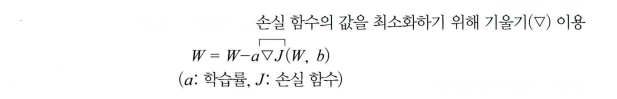

- 미니 배치 경사 하강법의 원리

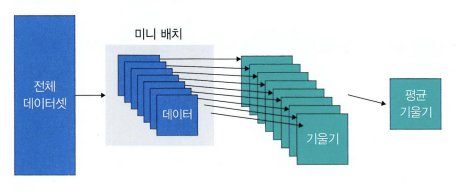

- 경사 하강법, 확률적 경사 하강법, 미니 배치 경사 하강법의 비교

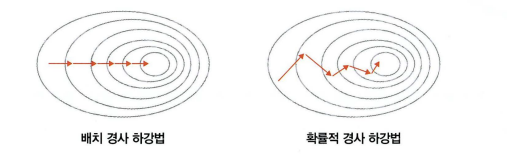

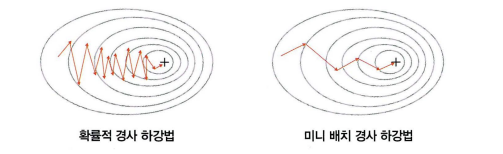



```

#  미니 배치 경사 하강법을 구현한 코드

class CustomDataset(Dataset):
   def __init__(self):
      self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
      self.y_data = [[12], [18], [11]]
      def __len__(self):
         return len(self.x_data)
      def __getitem__(self, idx):
         x = torch.FloatTensor(self.x_data[idx])
         y = torch.FloatTenseo(self.y_data[idx])
         return x, y

dataset = CustomDataset()
dataloader = DataLoader(
  dataset,    #...데이터셋
  batch_size=2   #...미니 배치 크기로 2의 제곱수를 사용
  shuffle=True   #...데이터를 불러올 때마다 랜덤으로 섞어서 가져옴.
)
```



####+) 옵티마이저

- 확률적 경사 하강법의 파라미터 변경 폭이 불안정한 문제를 해결하기 위해서
- 옵티마이저를 이용해 학습 속도와 운동량을 조정

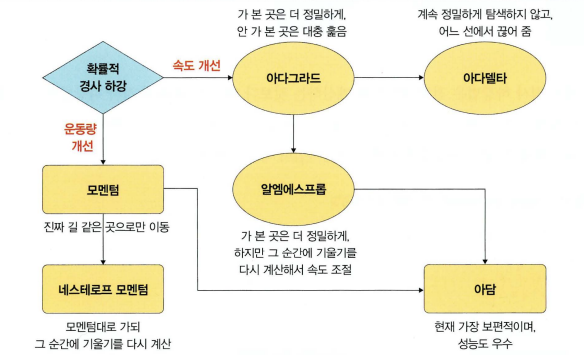

#### 4.2.4 딥러닝을 사용할 때 이점
- 특성 추출의 과정을 알고리즘에 통합시킴.
   - 특성 추출이란? 데이터별로 어떤 특징을 가지고 있는지 찾아내고 그것을 토대로 데이터를 벡터로 변환하는 작업을 의미.  
- 데이터의 특성을 잘 잡아내고자 은닉층을 깊게 쌓는 방식으로 파라미터를 늘린 모델 구조
- 딥러닝 학습을 이용한 특성 추출은 데이터 사례가 많을수록 성능이 향상됨.
- 따라서 확보된 데이터가 적다면 머신러닝을 고려해야함.

## 4.3 딥러닝 알고리즘
공통적으로 심층 신경망을 사용함.
#### 4.3.1 심층 신경망 (DNN)
- 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망
- 별도의 트릭 없이 비선형적 관계를 학습할 수 있음.
- 그러나 학습을 위한 연산량이 많고 기울기 소멸 문제 등이 발생 가능
- 문제를 해결하기 위해 드롭아웃, 렐루 함수, 배치 정규화를 적용


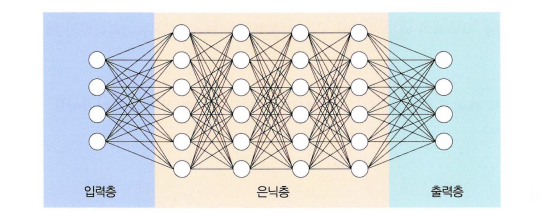

#### 4.3.2 합성곱 신경망 (CNN)

- 합성곱층, 풀링층을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘
- 이미지 데이터에서 객체를 탐색하거나 객체 위치를 찾아내는데에 유용
- 대표적으로 VGG, AlexNet 등이 있음.
- 기존 신경망과의 차이점
   - 각 층의 입출력 형상을 유지
   - 이미지의 공간 정보를 유지하면서 인접 이미지와 차이가 있는 특징을 효과적으로 인식
   - 복수 필터로 이미지의 특성을 추출하고 학습
   - 추출한 이미지의 특징을 모으고 강화하는 풀링층이 존재
   - 필터를 공유 파라미터로 사용하기 때문에 학습 파라미터가 매우 적음.
  


#### 4.3.3 순환 신경망 (RNN)
- 시계열 데이터(음악, 영상) 같이 시간 흐름에 따라 변화하는 데이터를 학습시킴.
- '순환', 현재 결과가 이전 결과가 연관이 있다는 뜻
- 시간성을 가진 데이터가 많음.
- 시간성 정보를 이용하여 데이터의 특정을 잘 다룸.
- 시간에 따라 내용이 변화므로 데이터는 동적이고, 길이가 가변적
- 기울기 소멸 문제로 학습이 제대로 되지 않음.
- RNN + 메모리 = LSTM
- 언어 모델링, 텍스트 생성, 자동 번역, 음성 인식, 이미지 캡션 생성 등 자연어 처이 분야와 궁합이 맞음.

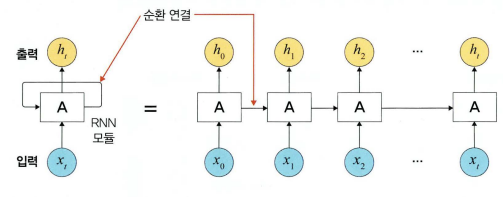

#### 4.3.4 제한된 볼츠만 머신 (Boltzmann machine, RBM)
- 가시층과 은닉층으로 구성된 모델
- 가시층은 은닉층과만 연결됨.
- 차원 감소, 분류, 선형 회귀 분석, 협업 필터링, 특성 값 학습, 주제 모델링에 사용
- 기울기 소멸 문제를 해결하기 위해 사전 학습 용도로 활용 능

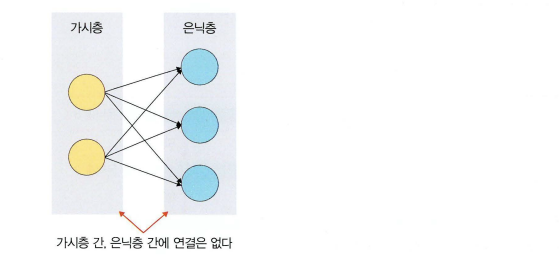

#### 4.3.5 심층 신뢰 신경망 (DBN)
- 사전 훈련된 제한된 볼츠만 머신을 층층이 쌓아올린 구조
- 레이블이 없는 데이터에 대한 비지도 학습이 가능
- 부분적인 이미지에서 전체를 연상하는 일반화와 추상화 과정 구현에 유용
- 순차적으로 심층 신뢰 신경망을 학습시켜서 계층적 구조를 생성
- 위로 올라갈수록 추상적 특징을 추출
- 학습된 가중치를 다층 퍼셉트론의 가중치 초깃값으로 사용
- 단계
   1. 가시층과 은닉층 1에 제한된 볼츠만 머신을 사전 훈련
   2. 첫번째 층 입력 데이터와 파라미터를 고정하여 두번째 층 제한된 볼츠만 머신을 사전 훈련
   3. 원하는 층 개수만큼 제한된 볼츠만 머신을 쌓아올려서 전테 DBN 완성

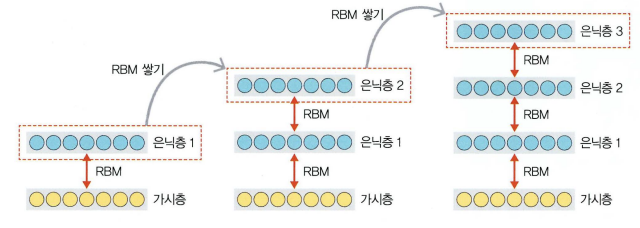